In [443]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
numpy.random.seed(7)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
import nltk
nltk.download('stopwords')
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from nltk.stem.snowball import SnowballStemmer
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
from nltk.tokenize import WordPunctTokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
data = pd.read_csv('/content/enron_train.csv',names = ['intent', 'Messages'],error_bad_lines=False)
test = pd.read_csv('/content/enron_test.csv',names = ['intent', 'Messages'],error_bad_lines=False)

In [445]:
data['intent'].value_counts()

No     1857
Yes    1719
Name: intent, dtype: int64

In [446]:
test['intent'].value_counts()

No     683
Yes    309
Name: intent, dtype: int64

In [0]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_labels = encoder.fit_transform(data['intent'])
#train_labels=pd.get_dummies(data['intent'])

In [0]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
test_labels = encoder.fit_transform(test['intent'])
#test_labels=pd.get_dummies(test['intent'])

In [0]:
##train_labels

In [0]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

In [0]:
# apply the above function to df['text']

data['Messages'] = data['Messages'].map(lambda x: clean_text(x))
test['Messages'] = test['Messages'].map(lambda x: clean_text(x))

In [0]:
### Create sequence
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(data['Messages'])
sequences = tokenizer.texts_to_sequences(data['Messages'])
train = pad_sequences(sequences, maxlen=50)

In [0]:
### Create sequence
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(test['Messages'])
sequences = tokenizer.texts_to_sequences(test['Messages'])
test = pad_sequences(sequences, maxlen=50)

In [0]:
from sklearn.model_selection import train_test_split
X_train=train
X_test=test
Y_train=train_labels
Y_test=test_labels
##X_train, X_test, Y_train, Y_test = train_test_split(X,labels, test_size = 0.10, random_state = 42)

In [455]:
Y_test.shape

(992,)

In [456]:
## Network architecture

model = Sequential()
model.add(Embedding(20000, 100, input_length=50))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Fit the model

history =model.fit(X_train,train_labels,validation_data=[X_test,Y_test],epochs=10)

Train on 3576 samples, validate on 992 samples
Epoch 1/10
3576/3576 [==============================] - 20s 6ms/step - loss: 0.6527 - acc: 0.6138 - val_loss: 0.7852 - val_acc: 0.5685
Epoch 2/10
3576/3576 [==============================] - 11s 3ms/step - loss: 0.5198 - acc: 0.7413 - val_loss: 0.7664 - val_acc: 0.5887
Epoch 3/10
3576/3576 [==============================] - 11s 3ms/step - loss: 0.4562 - acc: 0.7864 - val_loss: 0.8656 - val_acc: 0.5524
Epoch 4/10
3576/3576 [==============================] - 11s 3ms/step - loss: 0.4048 - acc: 0.8230 - val_loss: 0.9452 - val_acc: 0.5554
Epoch 5/10
3576/3576 [==============================] - 11s 3ms/step - loss: 0.3693 - acc: 0.8378 - val_loss: 0.9667 - val_acc: 0.5282
Epoch 6/10
3576/3576 [==============================] - 11s 3ms/step - loss: 0.3334 - acc: 0.8577 - val_loss: 0.9985 - val_acc: 0.5575
Epoch 7/10
3576/3576 [==============================] - 11s 3ms/step - loss: 0.3144 - acc: 0.8683 - val_loss: 1.2407 - val_acc: 0.5212
Epoch 8/

In [0]:
predicted = model.predict(X_test, verbose=2)
predicted_labels = predicted.argmax(axis=1)

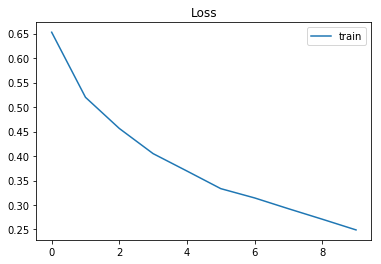

In [458]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show();

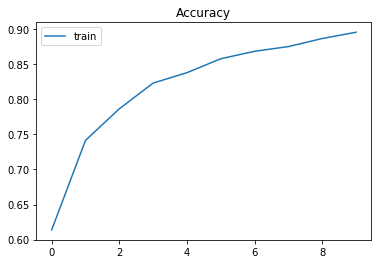

In [459]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.show();

In [460]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(vocabulary_size, 100, input_length=50))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(32, activation="relu"))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='rmsprop',    metrics=['accuracy'])
    return model_conv

model_conv = create_conv_model()
history =model_conv.fit(X_train,train_labels,validation_data=[X_test,Y_test],epochs=10)

Train on 3576 samples, validate on 992 samples
Epoch 1/10
3576/3576 [==============================] - 12s 3ms/step - loss: 0.6841 - acc: 0.5506 - val_loss: 0.6597 - val_acc: 0.6492
Epoch 2/10
3576/3576 [==============================] - 3s 768us/step - loss: 0.5783 - acc: 0.6860 - val_loss: 0.6918 - val_acc: 0.6391
Epoch 3/10
3576/3576 [==============================] - 3s 770us/step - loss: 0.5174 - acc: 0.7290 - val_loss: 0.9219 - val_acc: 0.4224
Epoch 4/10
3576/3576 [==============================] - 3s 776us/step - loss: 0.4714 - acc: 0.7508 - val_loss: 0.8419 - val_acc: 0.5827
Epoch 5/10
3576/3576 [==============================] - 3s 793us/step - loss: 0.4265 - acc: 0.7740 - val_loss: 0.8768 - val_acc: 0.4970
Epoch 6/10
3576/3576 [==============================] - 3s 791us/step - loss: 0.3885 - acc: 0.7978 - val_loss: 0.9690 - val_acc: 0.5020
Epoch 7/10
3576/3576 [==============================] - 3s 792us/step - loss: 0.3504 - acc: 0.8149 - val_loss: 1.0450 - val_acc: 0.5121
Ep

In [0]:
predicted = model_conv.predict(X_test , verbose=2)
predicted_labels = predicted.argmax(axis=1)

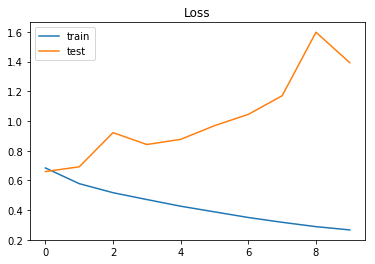

In [462]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

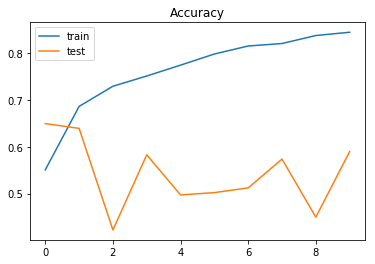

In [463]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
from gensim.models import Word2Vec

In [465]:
model = Word2Vec(data['Messages'], size=300, window=5, min_count=5, workers=16, sg=0, negative=5)

W0616 15:11:04.418688 140348080543616 word2vec.py:1546] Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
W0616 15:11:04.676915 140348080543616 base_any2vec.py:1386] under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


In [0]:
word_vectors = model.wv

MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200


In [467]:
print("Number of word vectors: {}".format(len(word_vectors.vocab)))

Number of word vectors: 42


In [468]:
import gensim
word_model = gensim.models.Word2Vec(data['Messages'].values, size=300, min_count=1, iter=10)
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, 300))
for i, vec in enumerate(word_model.wv.vectors):
    embedding_matrix[i] = vec
    
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = len(word_model.wv.vocab)+1
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Messages'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

W0616 15:11:04.717021 140348080543616 word2vec.py:1546] Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.


Found 3809 unique tokens.


In [0]:
#from sklearn.model_selection import train_test_split
#X = tokenizer.texts_to_sequences(data['Messages'].values)
#X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#print('Shape of data tensor:', X.shape)
#X_train, X_test, Y_train, Y_test = train_test_split(X,labels, test_size = 0.10, random_state = 42)
#print(X_train.shape,Y_train.shape)
#print(X_test.shape,Y_test.shape)


In [469]:
import pandas as pd
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import re
from nltk.corpus import stopwords
import gensim, re
model = Sequential()
model.add(Embedding(len(word_model.wv.vocab)+1,300,input_length=X_train.shape[1],weights=[embedding_matrix],trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, 50, 300)           13500     
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 50, 300)           0         
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 12, 300)           0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 300)               721200    
_________________________________________________________________
dense_70 (Dense)             (None, 32)                9632      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 33        
Total params: 744,365
Trainable params: 730,865
Non-trainable params: 13,500
_________________________________________________________________

In [470]:
history =model.fit(X_train,train_labels, validation_data=[X_test,Y_test], epochs=10)

Train on 3576 samples, validate on 992 samples
Epoch 1/10
3576/3576 [==============================] - 12s 3ms/step - loss: 0.6850 - acc: 0.5587 - val_loss: 0.6245 - val_acc: 0.6704
Epoch 2/10
3576/3576 [==============================] - 3s 777us/step - loss: 0.6631 - acc: 0.5962 - val_loss: 0.6171 - val_acc: 0.6784
Epoch 3/10
3576/3576 [==============================] - 3s 776us/step - loss: 0.6530 - acc: 0.6057 - val_loss: 0.7062 - val_acc: 0.5302
Epoch 4/10
3576/3576 [==============================] - 3s 780us/step - loss: 0.6455 - acc: 0.6116 - val_loss: 0.6581 - val_acc: 0.5645
Epoch 5/10
3576/3576 [==============================] - 3s 777us/step - loss: 0.6384 - acc: 0.6152 - val_loss: 0.6510 - val_acc: 0.5857
Epoch 6/10
3576/3576 [==============================] - 3s 783us/step - loss: 0.6328 - acc: 0.6177 - val_loss: 0.6766 - val_acc: 0.6442
Epoch 7/10
3576/3576 [==============================] - 3s 780us/step - loss: 0.6263 - acc: 0.6334 - val_loss: 0.6123 - val_acc: 0.6885
Ep

In [0]:
predicted = model.predict(X_test, verbose=2)
predicted_labels = predicted.argmax(axis=1)

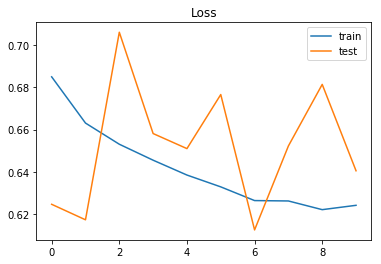

In [472]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

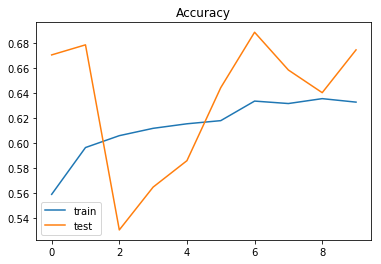

In [473]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [474]:
## create model
model_glove = Sequential()
model_glove.add(Embedding(len(word_model.wv.vocab)+1,300,input_length=X_train.shape[1],weights=[embedding_matrix],trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(32, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Fit train data
history = model_glove.fit(X_train,train_labels, validation_data=[X_test,Y_test], epochs = 10)

Train on 3576 samples, validate on 992 samples
Epoch 1/10
3576/3576 [==============================] - 12s 3ms/step - loss: 0.6753 - acc: 0.5761 - val_loss: 0.6254 - val_acc: 0.6976
Epoch 2/10
3576/3576 [==============================] - 3s 729us/step - loss: 0.6433 - acc: 0.6230 - val_loss: 0.6135 - val_acc: 0.6925
Epoch 3/10
3576/3576 [==============================] - 3s 725us/step - loss: 0.6260 - acc: 0.6393 - val_loss: 0.7447 - val_acc: 0.5685
Epoch 4/10
3576/3576 [==============================] - 3s 729us/step - loss: 0.6183 - acc: 0.6463 - val_loss: 0.6530 - val_acc: 0.6683
Epoch 5/10
3576/3576 [==============================] - 3s 739us/step - loss: 0.6095 - acc: 0.6521 - val_loss: 0.6946 - val_acc: 0.5897
Epoch 6/10
3576/3576 [==============================] - 3s 746us/step - loss: 0.6022 - acc: 0.6530 - val_loss: 0.6233 - val_acc: 0.6905
Epoch 7/10
3576/3576 [==============================] - 3s 741us/step - loss: 0.5949 - acc: 0.6574 - val_loss: 0.7009 - val_acc: 0.6643
Ep

In [0]:
predicted = model.predict(X_test, verbose=2)
predicted_labels = predicted.argmax(axis=1)

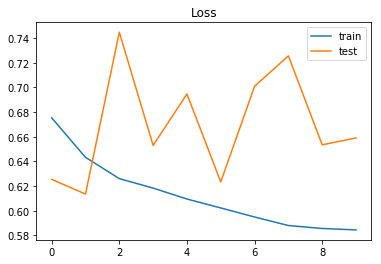

In [476]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

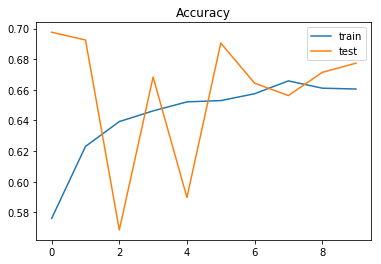

In [477]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification
# Function to calculate mean absolute error
def cross_val(X_train, Y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 5)
    return accuracies.mean()
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, Y_train)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, Y_train, model)
    # Return the performance metric
    return model_cross

In [499]:
naive = naive_bayes.GaussianNB()
naive_cross = fit_and_evaluate(naive)
print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.4874


In [488]:
seed = 7
model = XGBClassifier()
scoring = 'accuracy'
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("Accuracy:"+str(results.mean()))

Accuracy:0.6579990663296612


In [502]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
scoring = 'roc_auc'
cross = fit_and_evaluate(model)
print('Cross Validation Score = %0.4f' % cross)
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("AUROC:"+str(results.mean()))

Cross Validation Score = 0.6653
AUROC:0.7150539161215516


In [481]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
scoring = 'accuracy'
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("Accuracy:"+str(results.mean()))

Accuracy:0.6577185636140614


In [503]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
seed = 7
model = naive_bayes.MultinomialNB()
scoring = 'roc_auc'
cross = fit_and_evaluate(model)
print('Cross Validation Score = %0.4f' % cross)
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("AUROC:"+str(results.mean()))

Cross Validation Score = 0.5165
AUROC:0.5227465528837614


In [483]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
seed = 7
model = naive_bayes.MultinomialNB()
scoring = 'accuracy'
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("Accuracy:"+str(results.mean()))

Accuracy:0.516511337277029


In [504]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
seed = 7
model = linear_model.LogisticRegression()
scoring = 'roc_auc'
cross = fit_and_evaluate(model)
print('Cross Validation Score = %0.4f' % cross)
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("AUROC:"+str(results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logis

Cross Validation Score = 0.4978


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



AUROC:0.518611015742431


In [485]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
seed = 7
model = linear_model.LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("Accuracy:"+str(results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy:0.49775949321792246


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [505]:
from sklearn.model_selection import cross_val_score
scoring = 'roc_auc'
from xgboost import XGBClassifier
model=XGBClassifier()
cross = fit_and_evaluate(model)
print('Cross Validation Score = %0.4f' % cross)
results = cross_val_score(model,X_train, train_labels, cv=5, scoring=scoring)
print("AUROC"+str(results.mean()))

Cross Validation Score = 0.6580
AUROC0.7357319556411267


In [506]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
scoring = 'accuracy'
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("Accuracy:"+str(results.mean()))

Accuracy:0.6627406222871225


In [510]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
scoring = 'roc_auc'
cross = fit_and_evaluate(model)
print('Cross Validation Score = %0.4f' % cross)
results = cross_val_score(model,X_train, train_labels ,cv=5, scoring=scoring)
print("AUROC:"+str(results.mean()))

Cross Validation Score = 0.6759
AUROC:0.7392382856621069


In [507]:
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[464 219]
 [168 141]]


In [508]:
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       683
           1       0.39      0.46      0.42       309

    accuracy                           0.61       992
   macro avg       0.56      0.57      0.56       992
weighted avg       0.63      0.61      0.62       992



In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [0]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) 

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def random_forest_prediction(X_train_data,X_test_data,y_output):
    gs = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': [3, None],
            'n_estimators': (10, 30, 50, 100, 200, 400, 600, 800, 1000),
            'max_features': (2,4,6)
        }, cv=10, n_jobs=-1, scoring='roc_auc'
    )
    model = gs.fit(X_train_data,y_output)
    pred = model.predict(X_test_data)
    
    score = -model.best_score_
    
    return pred, score
    
pred,score = random_forest_prediction(X_train,X_test,Y_train)


In [0]:
report = classification_report(Y_test, pred)
print(report)